# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

19056


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'nucleus_and_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


# Load DAPI files

See the notebook below for **selected_dapi_image_fnames.pkl**:

[1_1_select_cells_for_DAPI](1_1_select_cells_for_DAPI.ipynb)

In [7]:
import pickle

selected_cell_fname = os.path.join(output_analysis_folder,'selected_dapi_image_fnames.pkl')

selected_cell_fname_dict = pickle.load(open(selected_cell_fname,'rb'))
selected_cell_fname_dict

{'L5 ET': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-118\\Nucleus_fov-118_cell-29.npy',
 'L5 IT': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-177\\Nucleus_fov-177_cell-51.npy',
 'L4/5 IT': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-15\\Nucleus_fov-15_cell-48.npy',
 'L2/3 IT': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0402_from_0329_v2\\FOV-86\\Nucleus_fov-86_cell-71.npy',
 'Pvalb': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-112\\Nucleus_fov-112_cell-69.npy',
 'Astro': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-9\\Nucleus_fov-9_cell-30.npy',
 'Oligo': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-99\\Nucleu

# Plot cells individually

In [10]:
plot_cell_order= ['Endo','Oligo','Astro', 'L4/5 IT','L2/3 IT','Pvalb', 'L5 IT', 'L5 ET']

vmin_max_dict = {'Endo':[6000,42000], 
                 'Oligo':[10000,50000],
                 'Astro':[1300,7000],
                 'L4/5 IT':[6500,40000],
                 'L2/3 IT':[1000,8000],
                 'Pvalb':[6500,45000],
                 'L5 IT':[6000,40000],
                 'L5 ET':[2000,30000],
                 }

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


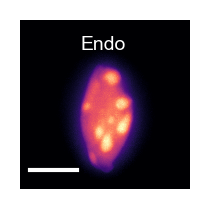

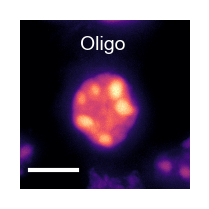

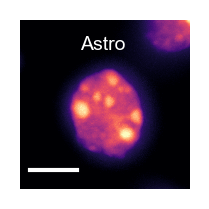

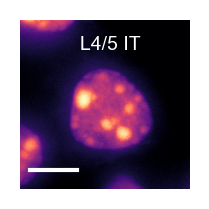

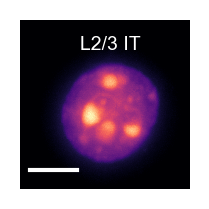

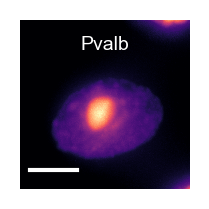

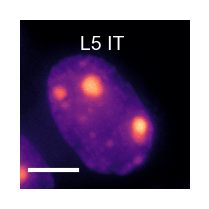

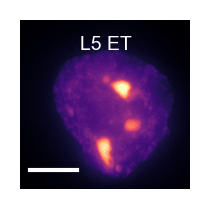

In [15]:
%matplotlib inline

refBar_len = 5 # in um


for _celltype in plot_cell_order[:]:
    
    # plotting param
    vmin, vmax = vmin_max_dict[_celltype]
    adjust_y = 0
    if _celltype == 'L5 ET':
        adjust_x = 0
    else:
        adjust_x = -10
            
    _save_filename = selected_cell_fname_dict[_celltype]
    if os.path.exists(_save_filename):
        im_feature = np.load(_save_filename)
        dna_im = im_feature[-1]
        dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
        # plot DAPI images
        fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
        ax.imshow(dna_im, cmap='magma', 
                  vmin=vmin, vmax=vmax,
                 )

        # start coordinate for colorbar
        _bar_starts = np.array([10,150
                                ]) 
        # end of colorbar
        _bar_ends = np.array([10+ (refBar_len*1000/108),150
                                ]) 

        _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                              [_bar_starts[1], _bar_ends[1]], 
                              color='white', 
                              linewidth=1.5)
        
        # other plotting params
        ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
        plt.axis('off')

        cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
        _celltype = _celltype.replace('/','_').replace(' ','_')
        fig_basename = f'DAPI_{cellname}_{_celltype}'
        # save pdf and png
        fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
        fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                    transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)